##     人工智慧 HW1 資料分析

S0854045 資工四 曾筠惠

### 1. 前置處理步驟

In [152]:
import pandas as pd #載入pandas套件命名引用码:pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

* 讀取檔案

In [153]:
rowdata = pd.read_csv('./diabetes.csv')
rowdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


* 檢查數據類型

In [154]:
rowdata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* 查看資料分布筆數

In [155]:
# 確認classification分組數量
Count = rowdata.groupby(["Outcome"], as_index=False)["Outcome"].agg({"cnt": "count"})
print(Count)


   Outcome  cnt
0        0  500
1        1  268


可知無雜訊資料

* 檢查數值特徵分佈

In [156]:
#紀錄資料型態不是object的數量
num_cols = [col for col in rowdata.columns if rowdata[col].dtype != 'object']
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

沒有object型態資料(數字字串混和)，因此不須轉換

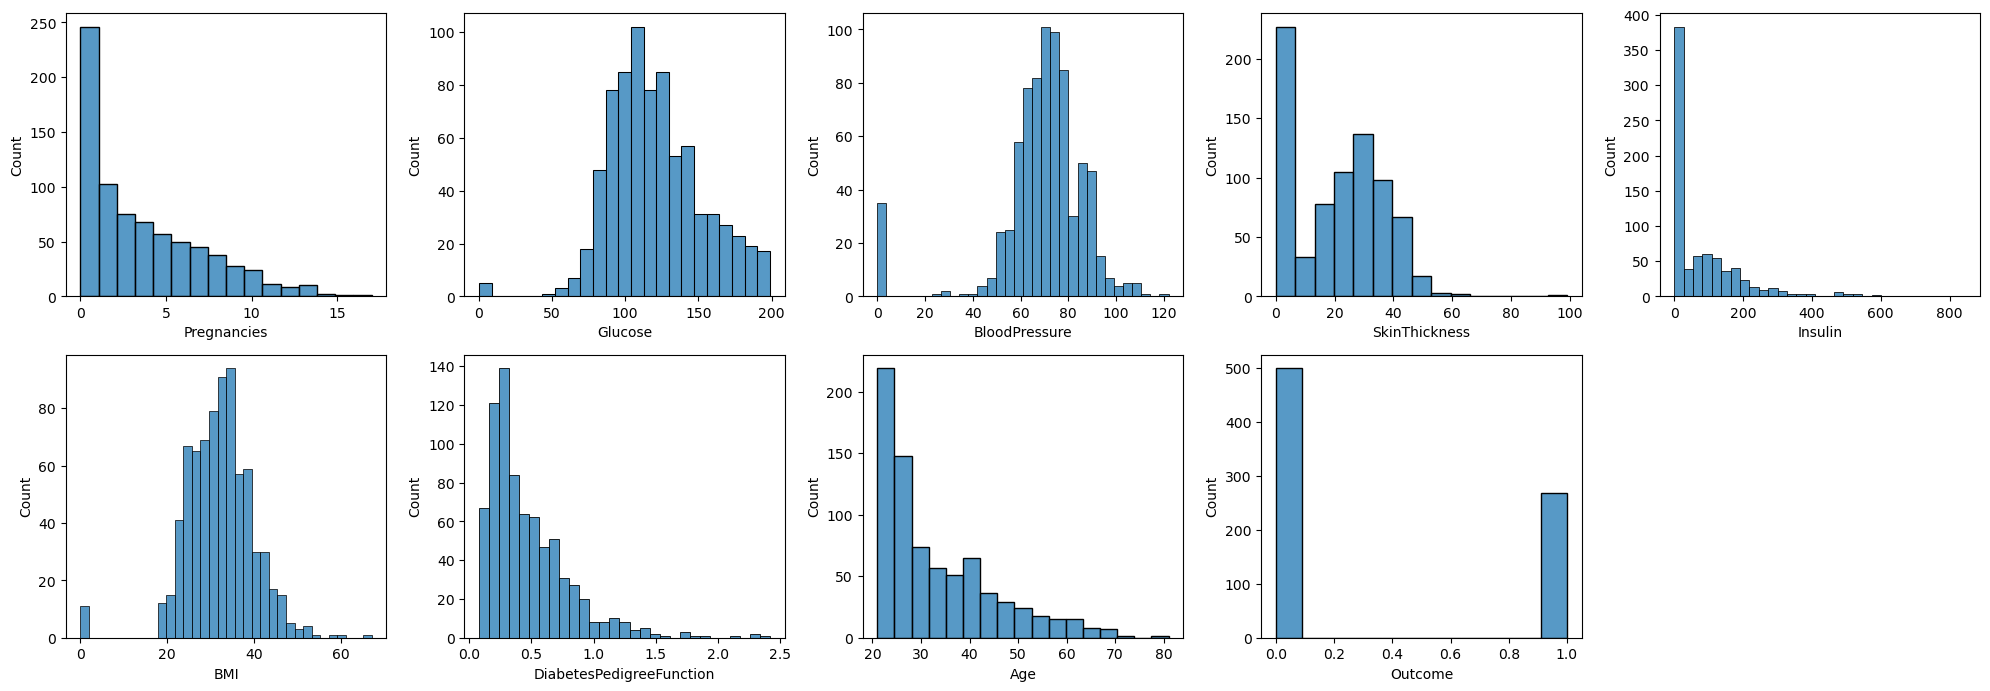

In [157]:

plt.figure(figsize =(20,10))
plot_number = 1
for column in num_cols:
    if plot_number <= 14:
        ax = plt.subplot(3, 5, plot_number)
        sns.histplot(rowdata[column]) #版本關系使用histplot
        plt.xlabel(column)
        
    plot_number += 1
    
plt.tight_layout()
plt.show()

In [158]:
#檢查缺失職數量
rowdata.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* 進行描述性統計

In [159]:
#定義畫圖的function
def violin(col):
    fig = px.violin(rowdata, y=col, x="Outcome", color="Outcome", box=True, template = 'plotly_dark')
    return fig.show()
                    
def kde(col):
    grid = sns.FacetGrid(rowdata, hue="Outcome", height = 6, aspect=2)
    grid.map(sns.kdeplot,col)
    grid.add_legend()
                    
def scatter(col1, col2):
    fig = px.scatter(rowdata, x=col1, y=col2, color="Outcome", template = 'plotly_dark')
    return fig.show()

繪製提琴圖 觀察'年齡'與'是否有糖尿病'的關係

可知年齡在25-45之間患有糖尿病的人多於沒有糖尿病

In [183]:
violin('Age')

繪製分布估計圖 觀察'隨機血糖'與'是否有糖尿病的關係'

由此估計圖可以發現血糖數值125以上，有糖尿病的人多於沒有
可猜測:血糖偏高的人會有糖尿病

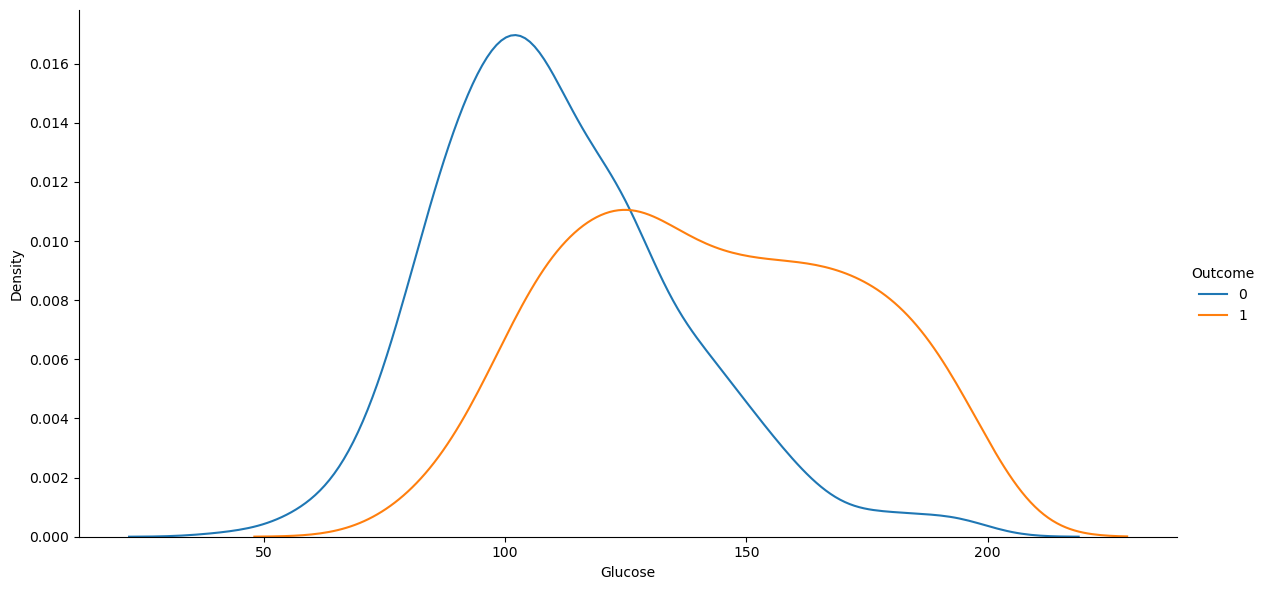

In [184]:
kde('Glucose')

繪製散步圖:由此散步圖可以發現血糖偏高的人會有糖尿病

其他特徵在分布圖上沒有明顯分布，例如:血壓，可知其並非導致糖尿病的主要原因，或是在此張圖無法看出其特徵分布

此外，從散步圖可發現有許多血壓值 = 0的點，但血壓值不可能為0，因此我們需要將這些資料做清整

In [162]:
scatter('Glucose', 'BloodPressure')

繪製分布估計圖 觀察'隨機血壓'與'是否有糖尿病的關係'

由此估計圖可以發現 兩條線幾乎重合

可猜測:血壓高不一定會有糖尿病
但有糖尿病的人血壓偏高

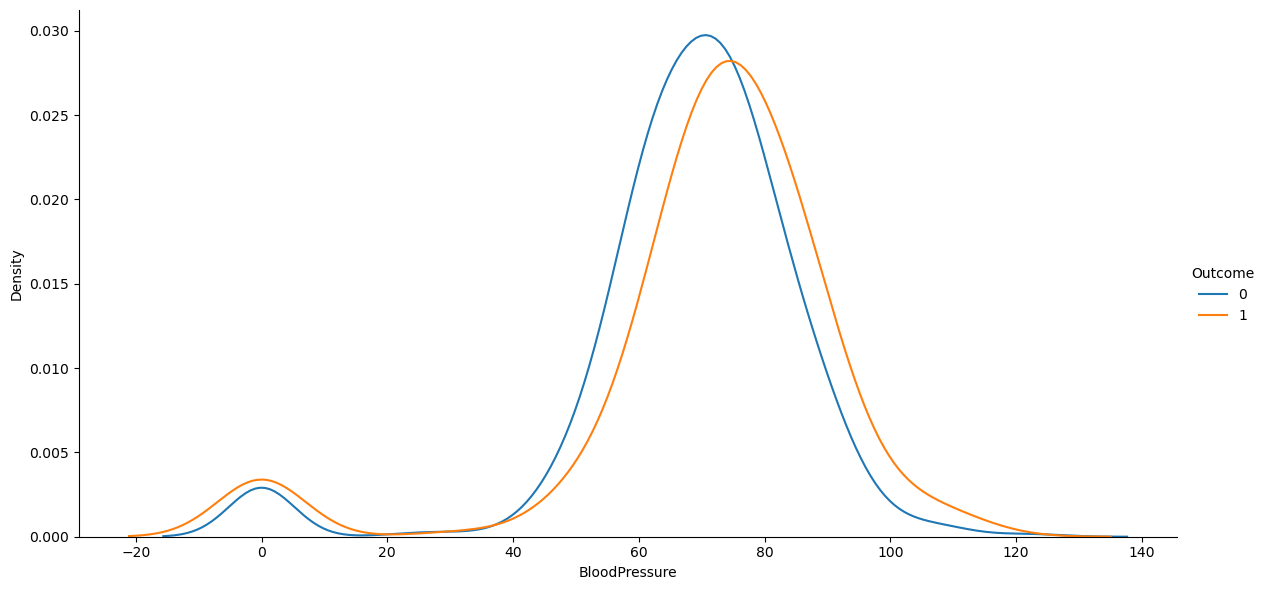

In [163]:
kde('BloodPressure')

在所有圖中，我發現 特徵 SkinThickness 三頭肌皮摺厚度 Insulin 胰島素濃度 BMI 等等數值皆不可能為0 
但 Pregnancies懷孕 此數值可以為0，因此不能所有=0的資料都清整

In [164]:
#檢查缺失值數量
rowdata.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [165]:
#移除缺失值 (可能會影響模型準確率，因此需要移除)
# 本次直接移除有缺值的欄位

rowdata.dropna(
    axis=0,     # axis=0: 對行進行操作; axis=1: 對列進行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必須全部是 NaN 才 drop 
    inplace=True)#是否在原資料上操作。如果為真，返回None否則返回新的copy，去掉了缺失值

data = rowdata.reset_index(drop=True) # 刪除'列'資料後，需要reset資料的索引 index

刪除重複資料

In [166]:
rowdata.drop_duplicates(inplace=True)

 "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" 皆不可能為0 
 
因此需要做資料清整
，將0由'NAN'取代

In [167]:
#NaN取代0 形成新資料集 rowdata_new
rowdata_new=rowdata
rowdata_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = rowdata_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

只刪除過多遺漏項目的樣本

In [168]:
#再次檢查缺失值數量
rowdata_new.isnull().sum(axis=0)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

由上圖發現 "Insulin", "SkinThickness"有太多缺失值，若直接刪除，資料量會少很多，因此使用 平均值 填補遺漏值

In [169]:
#mean values取代NaN
rowdata_new["SkinThickness"].fillna(rowdata_new["SkinThickness"].mean(), inplace = True)
rowdata_new["Insulin"].fillna(rowdata_new["Insulin"].mean(), inplace = True)

In [170]:
#再次檢查缺失值數量
rowdata_new.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

將剩下資料量較小的缺失值 移除

In [171]:
#移除缺失值 (可能會影響模型準確率，因此需要移除)
# 本次直接移除有缺值的欄位

rowdata_new.dropna(
    axis=0,     # axis=0: 對行進行操作; axis=1: 對列進行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必須全部是 NaN 才 drop 
    inplace=True)#是否在原資料上操作。如果為真，返回None否則返回新的copy，去掉了缺失值

rowdata_new= rowdata_new.reset_index(drop=True) # 刪除'列'資料後，需要reset資料的索引 index

In [172]:
#再次檢查缺失值數量
rowdata_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [173]:
#清整後的資料
print(rowdata_new)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
719           10    101.0           76.0       48.00000  180.000000  32.9   
720            2    122.0           70.0       27.00000  155.548223  36.8   
721            5    121.0           72.0       23.00000  112.000000  26.2   
722            1    126.0           60.0       29.15342  155.548223  30.1   
723            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

 * 區分特徵欄位與預測目標欄位:

In [174]:
x_features = rowdata_new.iloc[:,:-1] #從清整後trainingda拆fres
y_label= rowdata_new.iloc[:,-1]#從清整後trainingdata拆出label
x_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
719,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
720,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
721,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
722,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


### 2. 模型開發步驟


• 使用交叉驗證評估模型

因為資料量有724筆，使用k-fold交叉驗證評估模型

In [175]:
from sklearn.model_selection import KFold #本範例用k-fold來做所importpythonFo式

#定義叉驗(本範例用k-fd做)
kf = KFold(n_splits=5, shuffle=True, random_state=42) #sample random 成5分

* 選擇模型

In [176]:
from sklearn.linear_model import LinearRegression

#本範例選擇線性回歸模型 y=a*x+b
model = LinearRegression()

* 執行K-fold 交叉驗證

In [177]:
#執行kfold叉驗證
test_bias = []
test_variance =[]
train_errors =[]
test_errors =[]
for train_index,test_index in kf.split(x_features):
    #拆分數據集為訓練集和測試集
    x_train, y_train = x_features.iloc[train_index],y_label[train_index]
    x_test, y_test = x_features.iloc[test_index], y_label[test_index]
    #訓練模
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)# 預測訓練集資料
    y_test_pred =model.predict(x_test)# 預測測試集資料
    

計算偏差Bias和變異性Variance

In [178]:
#計算偏差Bias和變異性Variance(寫法1)
bias = np.sum((y_test_pred - np.mean(y_test)) ** 2) / len(y_test_pred)
variance = np.sum((y_test_pred - np.mean(y_test_pred)) ** 2) / len(y_test_pred)

test_bias.append(bias)
test_variance.append(variance)
#計算訓練和測試的誤差
train_error = np.sum((y_train_pred - y_train) ** 2) / len(y_train_pred)
test_error = np.sum((y_test_pred - y_test) **2) / len(y_test_pred)
train_errors.append(train_error)
test_errors.append(test_error)

In [179]:
#輸出bias and variance
print("Bias:",test_bias)
print("Variance:",test_variance)
#輸出平均訓練和測試誤差
print("平均訓練誤差:", sum(train_errors) / len(train_errors))
print("平均測試誤差:", sum(test_errors)/ len(test_errors))

Bias: [0.07099971349504036]
Variance: [0.07046347434900922]
平均訓練誤差: 0.15469828944401456
平均測試誤差: 0.15297597441780747


• 分析你選擇的模型(Bias variance等)

Bias variance接近0，可以說線性回歸在此資料上是好的模型

訓練誤差稍微高於測試的誤差的部分可以使用簡單模型或增加特徵來減少誤差

* 計算模型的准準確率 accuracy score

測試集與預測結果資料型態不同
測試集 :int
預測結果 :float

In [180]:
y_test.dtypes


dtype('int64')

In [181]:
y_test_pred

array([-0.04192116,  0.82138478,  0.40798158,  0.2207705 ,  0.31028704,
        0.65368489,  0.42107771,  0.18424798,  0.37814308,  0.18250351,
        0.94070226,  0.08088991,  0.85565247,  0.35853764,  0.4542441 ,
        0.37108352,  0.23233127,  0.69948435,  0.35590572,  0.51384273,
        0.46896488, -0.08977333, -0.16580772,  0.45364234,  0.58269422,
        0.05442719,  0.67223874,  0.20799217,  0.10940608,  0.29922748,
        0.21480313,  0.33177082,  0.28068367,  0.25549868,  0.16386446,
        0.18027408,  0.13364833, -0.04539481,  0.41129857,  0.43008724,
       -0.04154294,  0.78611054,  0.50844497,  0.37247903,  0.1709526 ,
        0.67724159,  0.34553928,  0.59456795,  0.4308075 ,  0.03980923,
        0.31433539,  0.23355096,  0.25487488,  0.32846127,  0.52672092,
        0.47503794,  0.58059224,  0.31777079,  0.58102849,  0.35440268,
        0.40865723,  0.32604936,  0.43213568,  0.23575377, -0.03974776,
        0.74496642,  0.35767507,  0.29370794, -0.0755186 ,  0.16

預測測試資料須轉換成同型態

In [182]:
from sklearn.metrics import accuracy_score

# 預測測試資料須四捨五入成 0,1
y_test_pred =np.around(y_test_pred ,0).astype(int) 

accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy : ",round(accuracy,2)*100,'%')

Accuracy :  79.0 %


正確率為79%，可知此模型算是好的，可以再增加數據集或是測試其他模型來優化